In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from lstm import (load_and_preprocess_nusax_sentiment, lstm_hyperparameter_analysis,
                   train_and_evaluate_lstm_variant, LSTMFromScratch, ManualSGD,
                   ManualSparseCategoricalCrossentropy, calculate_f1_macro)
from utils import calculate_f1_macro

2025-05-30 11:21:19.425898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-30 11:21:19.430548: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-30 11:21:19.441340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748578879.462465 2065662 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748578879.470046 2065662 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748578879.491428 2065662 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes, vocab_size, text_vectorizer = load_and_preprocess_nusax_sentiment(max_features=10000, maxlen=200)

Loading NusaX sentiment data...
Labels encoded. Classes: ['negative' 'neutral' 'positive'] -> [0 1 2]
Vocabulary size: 2836 (max_features was 10000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3


2025-05-30 11:21:24.387240: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
lstm_config = [{'units': 64, 'bidirectional': False}]  # Change this for each experiment

Configuration Description: Layers1_Units64_Uni
Configuration Details: [{'units': 64, 'bidirectional': False, 'return_sequences': False}]



=== LSTM Hyperparameter Analysis (NusaX Sentiment) ===

--- 1. Analysis: Number of LSTM Layers ---

--- Training LSTM: NumLayers_1 ---
LSTM Configs: [{'units': 64, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3784 - loss: 1.0883 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4063 - loss: 1.0858 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.3479 - loss: 1.0799 - val_accuracy: 0.3800 - val_loss: 1.0779


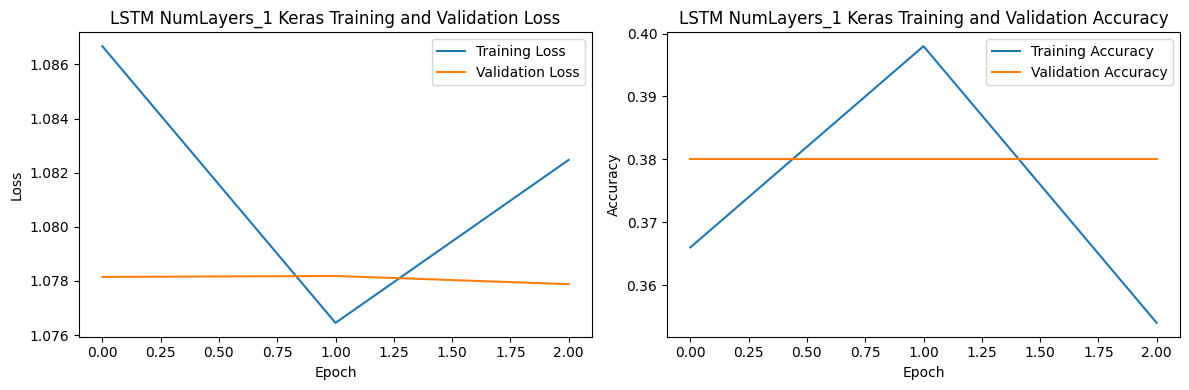

Test Accuracy (Keras LSTM NumLayers_1): 0.3775
Macro F1-Score (Keras LSTM NumLayers_1): 0.1827

--- Training LSTM: NumLayers_2 ---
LSTM Configs: [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,931 (1.62 MB)

 Trainable params: 424,931 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.3833 - loss: 1.0895 - val_accuracy: 0.3800 - val_loss: 1.0808
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.3473 - loss: 1.1146 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.4040 - loss: 1.0794 - val_accuracy: 0.3800 - val_loss: 1.0787


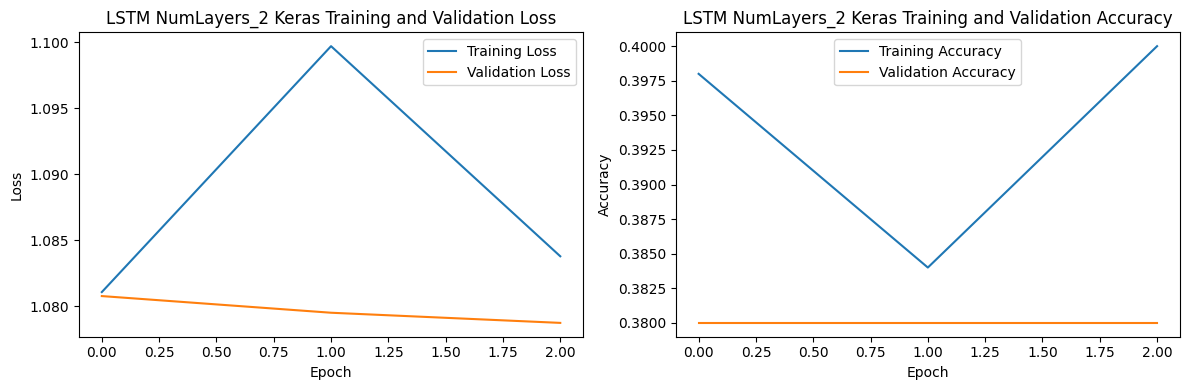

Test Accuracy (Keras LSTM NumLayers_2): 0.3825
Macro F1-Score (Keras LSTM NumLayers_2): 0.1844

--- Training LSTM: NumLayers_3 ---
LSTM Configs: [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False, 'return_sequences': True}, {'units': 16, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 200, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,019 (1.63 MB)

 Trainable params: 428,019 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.3320 - loss: 1.0961 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.3743 - loss: 1.0838 - val_accuracy: 0.3800 - val_loss: 1.0793
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.3890 - loss: 1.0871 - val_accuracy: 0.3800 - val_loss: 1.0785


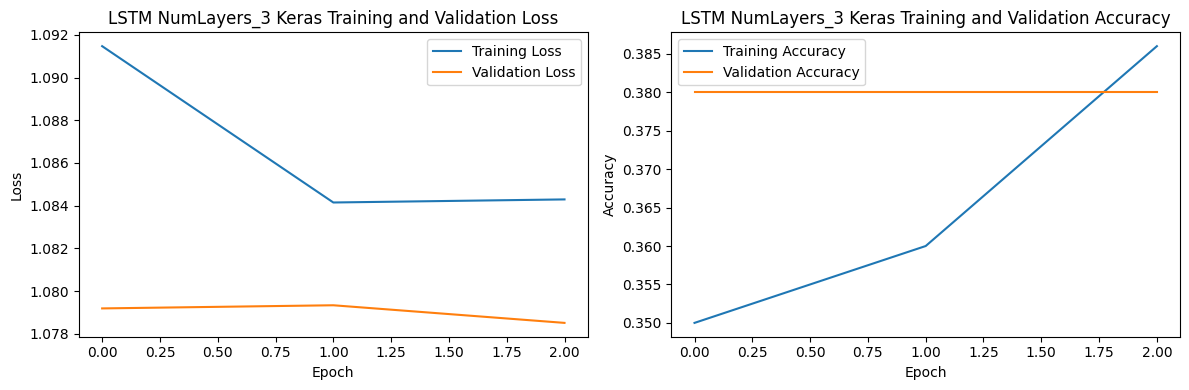

Test Accuracy (Keras LSTM NumLayers_3): 0.3825
Macro F1-Score (Keras LSTM NumLayers_3): 0.1844

Conclusion Number of LSTM Layers:
1 Layer F1: 0.1827, 2 Layers F1: 0.1844, 3 Layers F1: 0.1844
Increasing LSTM layers generally improves F1-score by capturing more complex patterns, but 3 layers may lead to overfitting if validation loss increases.

--- 2. Analysis: LSTM Units (Cells per Layer) ---

--- Training LSTM: Units_32 ---
LSTM Configs: [{'units': 32, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,715 (1.46 MB)

 Trainable params: 383,715 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3310 - loss: 1.0969 - val_accuracy: 0.3800 - val_loss: 1.0810
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3721 - loss: 1.0817 - val_accuracy: 0.3800 - val_loss: 1.0796
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3405 - loss: 1.0859 - val_accuracy: 0.3800 - val_loss: 1.0784


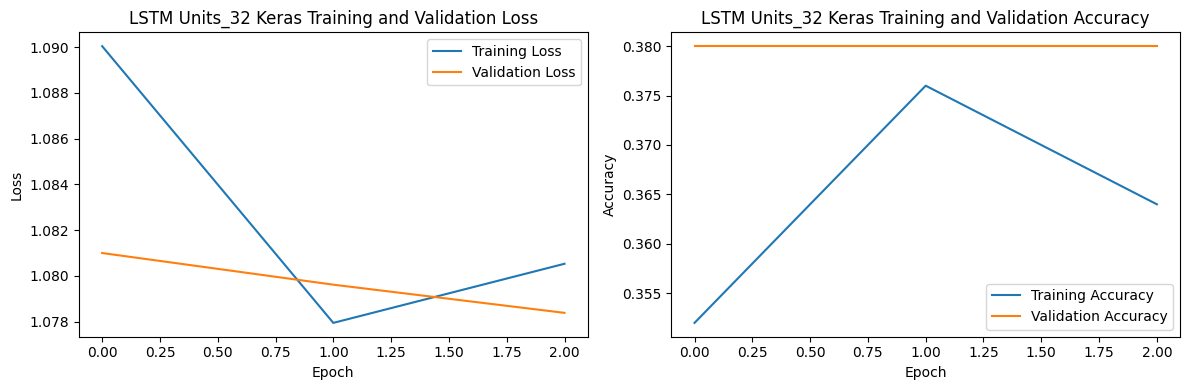

Test Accuracy (Keras LSTM Units_32): 0.3775
Macro F1-Score (Keras LSTM Units_32): 0.1827

--- Training LSTM: Units_64 ---
LSTM Configs: [{'units': 64, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3188 - loss: 1.0946 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4000 - loss: 1.0795 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3618 - loss: 1.0887 - val_accuracy: 0.3800 - val_loss: 1.0789


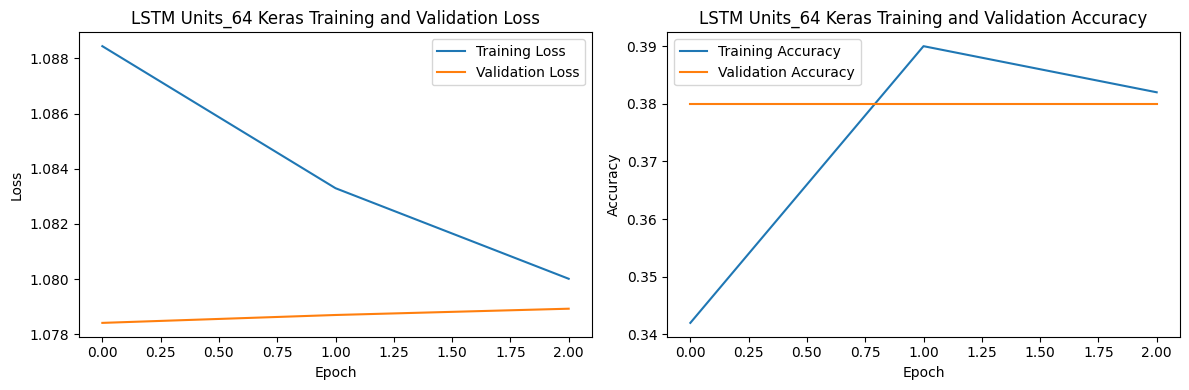

Test Accuracy (Keras LSTM Units_64): 0.3775
Macro F1-Score (Keras LSTM Units_64): 0.1827

--- Training LSTM: Units_128 ---
LSTM Configs: [{'units': 128, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,979 (1.89 MB)

 Trainable params: 494,979 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.3908 - loss: 1.0897 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.3586 - loss: 1.0829 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.3610 - loss: 1.0804 - val_accuracy: 0.3800 - val_loss: 1.0779


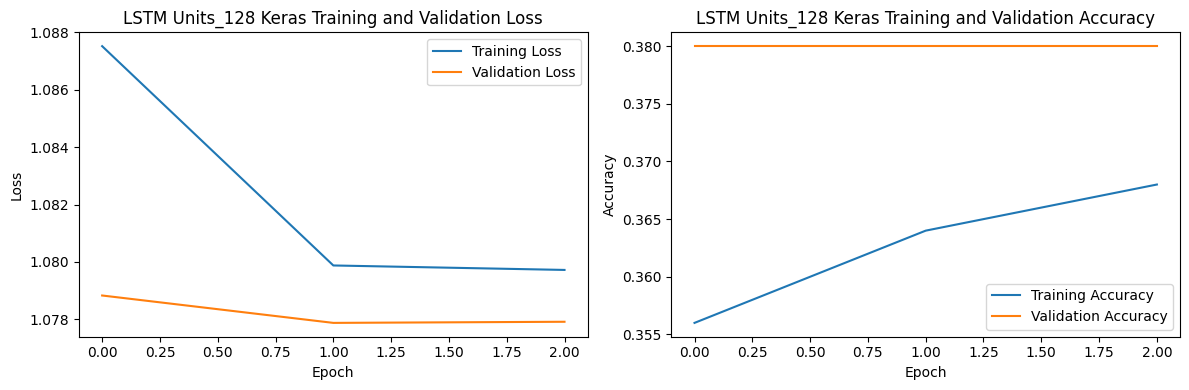

Test Accuracy (Keras LSTM Units_128): 0.3825
Macro F1-Score (Keras LSTM Units_128): 0.1844

Conclusion LSTM Units:
32 Units F1: 0.1827, 64 Units F1: 0.1827, 128 Units F1: 0.1844
Larger units improve F1-score by increasing model capacity, but 128 units may increase computation time without proportional gains.

--- 3. Analysis: Bidirectional vs. Unidirectional ---

--- Training LSTM: Direction_Uni ---
LSTM Configs: [{'units': 64, 'bidirectional': False}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3923 - loss: 1.0890 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4411 - loss: 1.0615 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3540 - loss: 1.0893 - val_accuracy: 0.3800 - val_loss: 1.0793


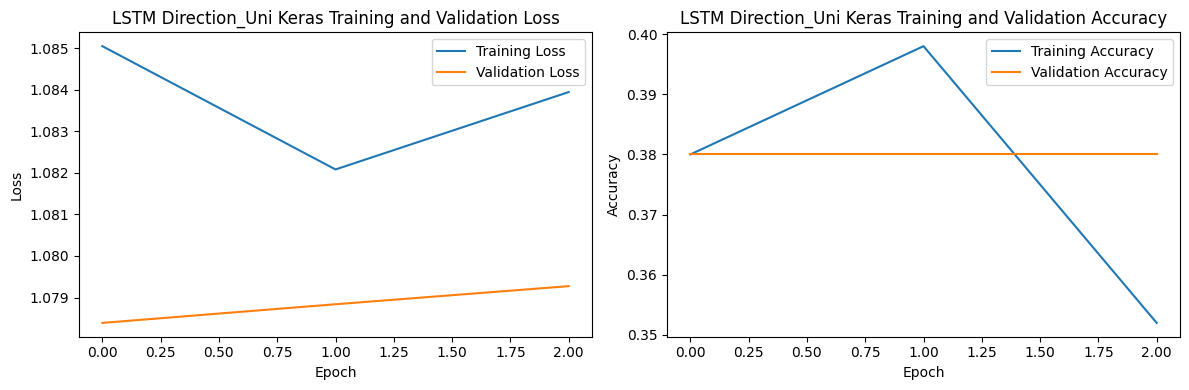

Test Accuracy (Keras LSTM Direction_Uni): 0.3825
Macro F1-Score (Keras LSTM Direction_Uni): 0.1844

--- Training LSTM: Direction_Bi ---
LSTM Configs: [{'units': 64, 'bidirectional': True}], Dropout: 0.5


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Keras_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm_1 (Bidirectional)       │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,211 (1.76 MB)

 Trainable params: 462,211 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.3584 - loss: 1.0909 - val_accuracy: 0.4700 - val_loss: 1.0569
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.4798 - loss: 1.0380 - val_accuracy: 0.5400 - val_loss: 0.9818
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5656 - loss: 0.9388 - val_accuracy: 0.6000 - val_loss: 0.9062


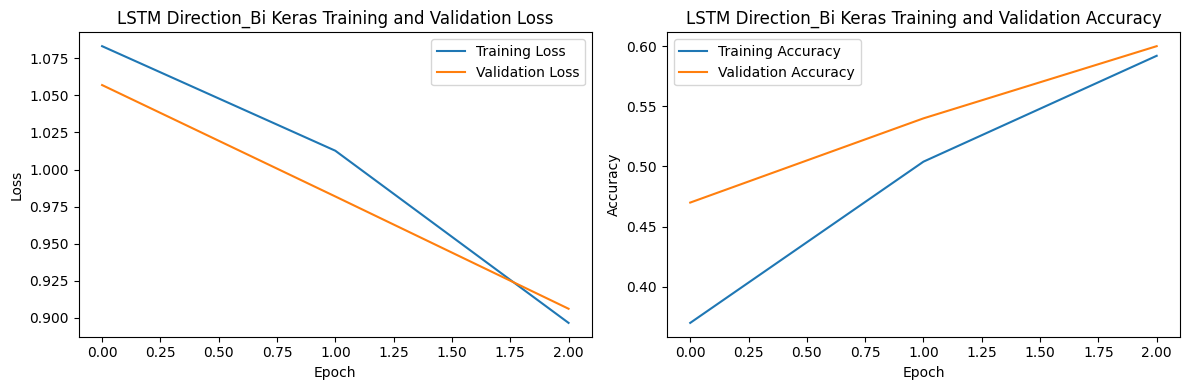

Test Accuracy (Keras LSTM Direction_Bi): 0.5700
Macro F1-Score (Keras LSTM Direction_Bi): 0.4377

Conclusion Bidirectionality:
Unidirectional F1: 0.1844, Bidirectional F1: 0.4377
Bidirectional LSTM typically outperforms unidirectional due to capturing context from both directions, improving F1-score.

--- Summary of F1 Scores (Keras LSTM Variants) ---
NumLayers_1: F1 = 0.1827
NumLayers_2: F1 = 0.1844
NumLayers_3: F1 = 0.1844
Units_32: F1 = 0.1827
Units_64: F1 = 0.1827
Units_128: F1 = 0.1844
Direction_Uni: F1 = 0.1844
Direction_Bi: F1 = 0.4377

Best Keras LSTM model saved as best_lstm_model.keras


In [3]:
MAX_LEN = 200
EMBEDDING_DIM = 128
best_lstm_model, results = lstm_hyperparameter_analysis(
    x_train, y_train, x_val, y_val, x_test, y_test,
    num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
    analysis_epochs=3
)

# Save plots for report
for desc, result in results.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(result['history'].history['loss'], label='Training Loss')
    plt.plot(result['history'].history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
    if 'sparse_categorical_accuracy' in result['history'].history:
        acc_key = 'sparse_categorical_accuracy'
        val_acc_key = 'val_sparse_categorical_accuracy'
    plt.plot(result['history'].history[acc_key], label='Training Accuracy')
    plt.plot(result['history'].history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.close()